Churn Prediction Models

ANN deep prodiction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Cargamos el Dataset

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1900,0754-EEBDC,Male,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,76.65,No
1204,6791-YBNAK,Male,0,Yes,Yes,18,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),25.55,467.85,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
3480,6060-QBMGV,Male,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.85,1433.8,No
6192,0439-IFYUN,Female,1,No,No,18,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,1294.6,No


#### Deletamos la columna de customerID ya que no nos será útil, y verificamos los tipos de variables

Los modelos de machine learning no se dan bien con variables no numéricas, por ello transformaremos todo a int y float

In [4]:
df.drop('customerID', axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Verificamos los casos en los que la columna "TotalCharges" posee un valor no numérico

In [5]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Podríamos imputar o substituir los valores según sus valores más próximos o el promedio, pero como son solo 11 valores faltantes en un data set de 7043, podemos simplesmente deletar las filas sin valores.

In [6]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [7]:
df.shape

(7043, 20)

In [8]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

Modificamos el tipo de variable

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Ale\AppData\Local\Temp\ipykernel_1796\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.TotalCharges.dtypes

dtype('float64')

Exploramos superficialmente la proporción entre churn y no churn

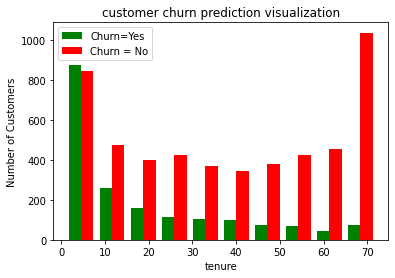

In [11]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_Yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_Yes,tenure_churn_no], color=['green','red'], label=['Churn=Yes','Churn = No'])
plt.xlabel("tenure")
plt.ylabel('Number of Customers')
plt.title('customer churn prediction visualization')
plt.legend()

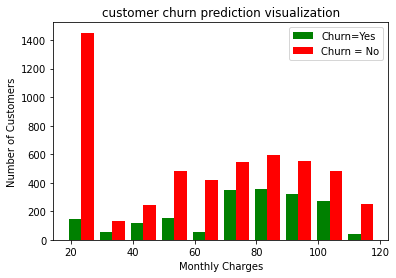

In [12]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no], color=['green','red'], label=['Churn=Yes','Churn = No'])
plt.xlabel("Monthly Charges")
plt.ylabel('Number of Customers')
plt.title('customer churn prediction visualization')
plt.legend() 

In [13]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

#### Observamos las respuestas posibles de las variables categoricas <br>

el termino "no internet service" y "no phone service" no significa nada además de un "No" por los que cambiaremos a "No"

In [14]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\Ale\AppData\Local\Temp\ipykernel_1796\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\Ale\AppData\Local\Temp\ipykernel_1796\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


#### Convertiremos las columnas categoricas de respuesta Yes = 1 , No = 0 (ya que los modelos de machine learning no aceptan bien variables no numéricas)

In [16]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService','MultipleLines','OnlineSecurity', 
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0}, inplace=True)

C:\Users\Ale\AppData\Local\Temp\ipykernel_1796\660529284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0}, inplace=True)


#### observamos las posibles respuestas en nuestro dataset <br>

aún hay respuestas no numéricas, con multiples opciones

In [17]:
for col in df:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [18]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Ale\AppData\Local\Temp\ipykernel_1796\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


#### Para las respuestas con más de 2 opciones, utilizaremos one hot encoder <br>
Para este método, crearemos nuevas columnas, en las que equivale cada columna a una respuesta de esa variable, con los valores 1 (para los que presentan ese tipo de respuesta de la variable) y 0 (para los que no presentan ese tipo de respuesta) <br>
Así se generarán n columnas nuevas por variable, siendo n el número de respuestas posibles para esa variable

In [19]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [20]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Para tener un proceso de machine learning con un sesgo menor, estandarizamos los valores entre 0 y 1 <br>
Para ello, ya tenemos nuestras variables categoricas entre 0 y 1 <br>
Falta transformar las variables numéricas superiores a 0 y 1

In [22]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']   ### agrupamos las columnas a reescalar

from sklearn.preprocessing import MinMaxScaler, minmax_scale
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [23]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1246,1,0,1,1,0.619718,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
3877,1,0,1,1,0.281690,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
5925,0,0,0,0,0.267606,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0


#### Ahora ya tenemos todos nuestros valores entre 0 y 1

In [24]:
for column in df2:

    print(f'{column} : {df2[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# Determinación de variables dependientes e independientes

#### seleccionamos cual será nuestra variable a predecir, que será la de Churn

In [25]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

#### Dividimos la muestra en datos de entrenamiento(80%) y de teste (20%)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [27]:
X_train.shape

(5625, 26)

In [28]:
X_test.shape

(1407, 26)

In [29]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


# Entrenamiento

Realizamos un entrenamiento con una red neuronal

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,),activation='relu'),        # el numero de neuronas es equivalente al numero de columnas (variables independientes)
    keras.layers.Dense(1, activation = 'sigmoid')                       # en la última columna tendremos una convergencia de las camadas, para una respuesta clasificatoria
])

model.compile(optimizer = 'adam',                                       #Dentro de las métricas nos fijaremos en el accuracy
                loss='binary_crossentropy',                             #en loss utilizaremos binary_crossentropy por tratarse de una clasificación binaria, y por medio de tentativa y erro llegué a esta opción
                metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)                                   #Probamos con 100 epochs, y nos devuelven buenos resultados, cuidamos para no caer en overfitting

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4977 - accuracy: 0.7463
Epoch 2/100
176/176 [==============================] - 0s 749us/step - loss: 0.4330 - accuracy: 0.7879
Epoch 3/100
176/176 [==============================] - 0s 725us/step - loss: 0.4208 - accuracy: 0.7982
Epoch 4/100
176/176 [==============================] - 0s 749us/step - loss: 0.4172 - accuracy: 0.8005
Epoch 5/100
176/176 [==============================] - 0s 754us/step - loss: 0.4150 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 754us/step - loss: 0.4136 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 726us/step - loss: 0.4128 - accuracy: 0.8076
Epoch 8/100
176/176 [==============================] - 0s 863us/step - loss: 0.4119 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 0s 766us/step - loss: 0.4110 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 0s 726us/step - los

In [31]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 628us/step - loss: 0.4647 - accuracy: 0.7733


[0.4646812081336975, 0.7732764482498169]

# Realizamos las predicciones

In [32]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 535us/step


array([[0.252042  ],
       [0.43159786],
       [0.02226678],
       [0.75045836],
       [0.55760944]], dtype=float32)

In [33]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

# División entre tendrá Churn y no tendrá Churn

Para ello, dividiremos las probabilidades resultantes en mayores a 0.5 (>0.5) y menores a 0.5 (<0.5) <br>
<br>
Esto es debido a que, en la tabla original, los registros son por churn y no churn

In [34]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)

    else:
        y_pred.append(0)

Podemos verificar superficialmente qué tan acertado son los 10 primeros valores

In [35]:
print(y_pred[:10])
print(y_test[:10])

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64


#### Bonus track: matriz de confusión.

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.65      0.48      0.55       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

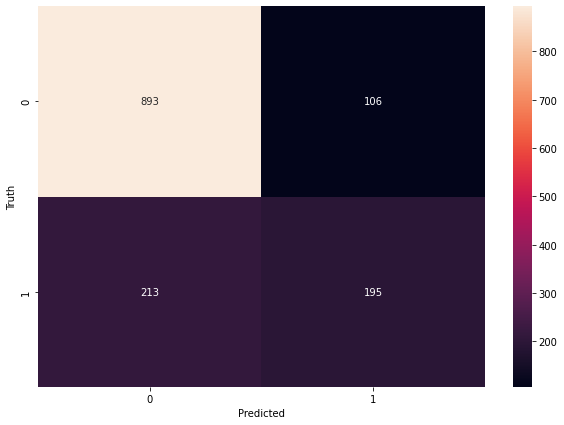

In [37]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize= (10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')